# Data Exploration

Importing data from the file and printing a sample

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(183608)

data = pd.read_csv('Assignment1dataset22.csv',header='infer')
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,label
0,0,0,0,0,0,0,0,70194,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,70193,0,0,0,0,13,0,0
2,0,0,0,0,0,0,0,70192,8153,0,0,0,5,1,0
3,0,0,0,0,0,0,0,70191,420,0,0,0,30,1,0
4,0,0,0,0,0,0,0,70190,2251,0,0,0,3,1,0


Information about a the dataFrame where data was loaded

In [2]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70194 entries, 0 to 70193
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X0      70194 non-null  int64
 1   X1      70194 non-null  int64
 2   X2      70194 non-null  int64
 3   X3      70194 non-null  int64
 4   X4      70194 non-null  int64
 5   X5      70194 non-null  int64
 6   X6      70194 non-null  int64
 7   X7      70194 non-null  int64
 8   X8      70194 non-null  int64
 9   X9      70194 non-null  int64
 10  X10     70194 non-null  int64
 11  X11     70194 non-null  int64
 12  X12     70194 non-null  int64
 13  X13     70194 non-null  int64
 14  label   70194 non-null  int64
dtypes: int64(15)
memory usage: 8.0 MB
None


Checking how many instances of each class, what is the dataset like in terms of features and samples, missing values or duplicates

In [3]:
print(data['label'].value_counts())
print("The dataset has", data.shape[0], "samples and", data.shape[1]-1, "features")
missing_values = data.isnull().sum().any()
print ('Are there missing values?', missing_values)
print("Are there duplicated instances?'", data.iloc[:,3:].duplicated().sum().any())

0    66670
1     3524
Name: label, dtype: int64
The dataset has 70194 samples and 14 features
Are there missing values? False
Are there duplicated instances?' False


Print statistics of features in the data

In [4]:
data.describe(include='all')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,label
count,70194.00000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,7.019400e+04,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000
mean,0.00057,0.002764,0.486338,0.001966,0.001952,0.539961,0.020899,35097.500000,4.124542e+03,0.001382,160.100621,0.012323,32.316437,0.675656,0.050204
std,0.02503,0.101522,32.071616,0.060359,0.044136,32.683800,0.631882,20263.406735,6.411336e+04,0.050761,1272.409804,0.110324,81.800379,0.468133,0.218367
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17549.250000,6.700000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35097.500000,3.370000e+02,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52645.750000,1.875000e+03,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000
max,2.00000,8.000000,7479.000000,2.000000,1.000000,7468.000000,43.000000,70194.000000,7.028652e+06,4.000000,40504.000000,1.000000,511.000000,1.000000,1.000000


Separate features from labes
Getting the feature names

In [5]:
# Extract features and label data
data_features = data.iloc[:, :-1]
data_labels = data.iloc[:, -1]
feature_names = data_features.columns  

Checking if there is any feature that has a unique index

In [6]:
cols=[]
for col in feature_names:
    if data_features[col].nunique() == data_features.shape[0]:
        print(col, "has as many unique values as instances in the dataset: it will not help with prediction therefore it can be dropped")
        cols.append(col)

X7 has as many unique values as instances in the dataset: it will not help with prediction therefore it can be dropped


#    Data Visualization

Doing boxplot of all the features after normalization

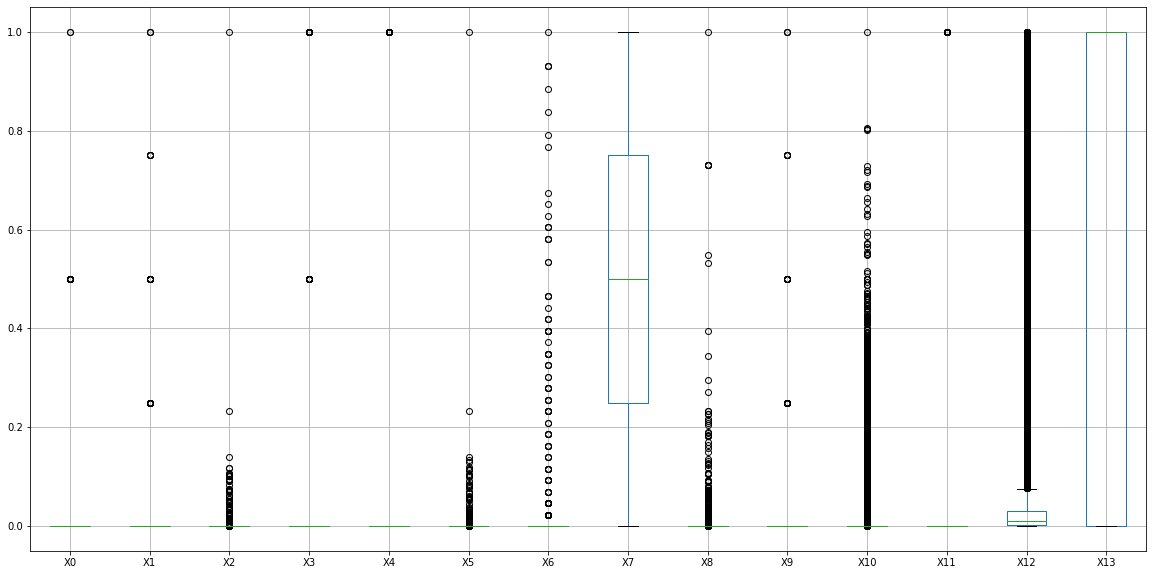

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data_features)
scaled_data_features = scaler.transform(data_features) 
data_to_plot = pd.DataFrame(data=scaled_data_features, columns = feature_names)
data_to_plot.boxplot(figsize=(20,10))
plt.show()

Similar to what was done in the sampleGaussian.py used in week 2, I have created a function to calculate the outliers using boxplot and then used this function in all the features of the dataset

In [8]:
def find_outliers(feature):   

    # finding the 1st quartile
    q1 = np.quantile(feature, 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(feature, 0.75)

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
        
    outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
    print("outliers", outliers)
          
    print("Number of boxplot anomalies:", len(outliers),"\nPercentage",100*len(outliers)/len(feature),"\n")
    return outliers

for (column_name, column_data) in data_features.iteritems():
    print('Column Name : ', column_name)
    outliers = find_outliers(data_features[column_name].to_numpy())

    

Column Name :  X0
outliers [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
Number of boxplot anomalies: 38 
Percentage 0.05413568111234578 

Column Name :  X1
outliers [4 2 2 4 2 2 6 2 2 2 8 2 2 2 2 2 4 2 2 6 2 2 2 2 6 8 2 2 2 2 8 2 2 4 2 2 2
 6 2 2 4 4 2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2]
Number of boxplot anomalies: 69 
Percentage 0.09829899991452261 

Column Name :  X2
outliers [   3    2   19    5    2    1    4    2    1    1    2    3    2    5
    1  107  462    2    2    2  110    1    1    6    2  151    1    2
    7   31    1    6    9    4    2    3    1    1    4  157   13    1
    1    5    5    2  558    1    2    2   12    1    1    4    4    3
   12  371    7    2    4    2    6    4    1    6  151  217   83    1
    3  193    6    2  789    2  520    6    2    4    4  884    6    2
  457    3    1    1    3  767    9    2    2    2    1    2    3    6
  756    2    6    2    2    1    1   21    1   10  281    6    1    1

Calculating the accuracy of the boxplot for every different feature

In [9]:
Q1 = data_features.quantile(0.25)
Q3 = data_features.quantile(0.75)
IQR = Q3 - Q1
#print(Q3)
mask = ((data_features < (Q1 - 1.5 * IQR)) | (data_features > (Q3 + 1.5 * IQR)))

for (column_name, column_data) in mask.iteritems():
    print('Column Name : ', column_name)
    feature_data_values= pd.Series(column_data.values)
    print(feature_data_values.value_counts())
    print(data.loc[feature_data_values,'label'].value_counts())
    print()

Column Name :  X0
False    70156
True        38
dtype: int64
0    38
Name: label, dtype: int64

Column Name :  X1
False    70125
True        69
dtype: int64
0    68
1     1
Name: label, dtype: int64

Column Name :  X2
False    69823
True       371
dtype: int64
0    368
1      3
Name: label, dtype: int64

Column Name :  X3
False    70115
True        79
dtype: int64
0    79
Name: label, dtype: int64

Column Name :  X4
False    70057
True       137
dtype: int64
0    137
Name: label, dtype: int64

Column Name :  X5
False    69565
True       629
dtype: int64
0    626
1      3
Name: label, dtype: int64

Column Name :  X6
False    69946
True       248
dtype: int64
0    247
1      1
Name: label, dtype: int64

Column Name :  X7
False    70194
dtype: int64
Series([], Name: label, dtype: int64)

Column Name :  X8
False    60947
True      9247
dtype: int64
0    9246
1       1
Name: label, dtype: int64

Column Name :  X9
False    70125
True        69
dtype: int64
0    68
1     1
Name: label, dtype:

# Feature selection

Plotting Pearson correlation of columns in the dataset

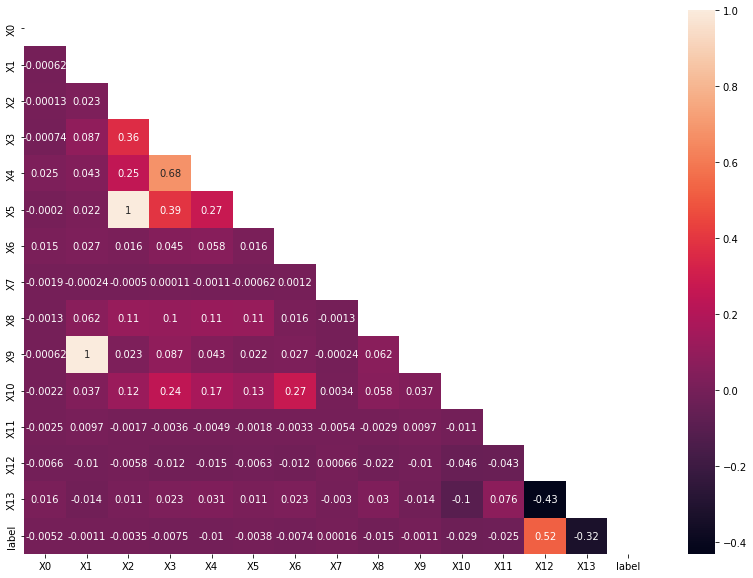

In [10]:
plt.figure(figsize=(14, 10))
hm = sns.heatmap(data.corr(), annot=True, mask=np.triu(data.corr()))
plt.show()

Based on the above, the pairs X1-X9 and X5-X2 have very strong correlation respectively and one of the features of each pair can be dropped.

https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

https://medium.com/brdata/correlation-straight-to-the-point-e692ab601f4c

Plotting Spearman correlation of columns in the dataset

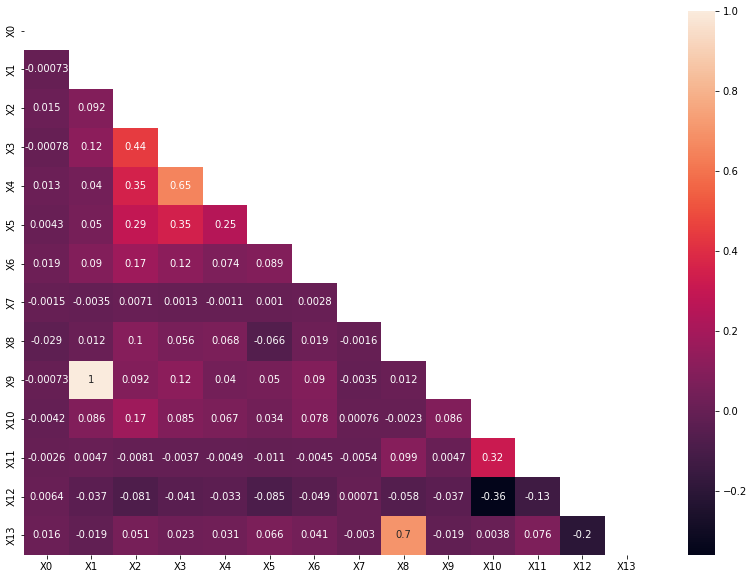

In [11]:
plt.figure(figsize=(14, 10))
corr = data_features.corr(method = 'spearman')
hm = sns.heatmap(corr, annot=True, mask=np.triu(corr))
plt.show()

Based on the above, the pairs X1-X9 and X8-X13 have very strong and strong correlation respectively and one of the features of each pair can be dropped.

Covariance

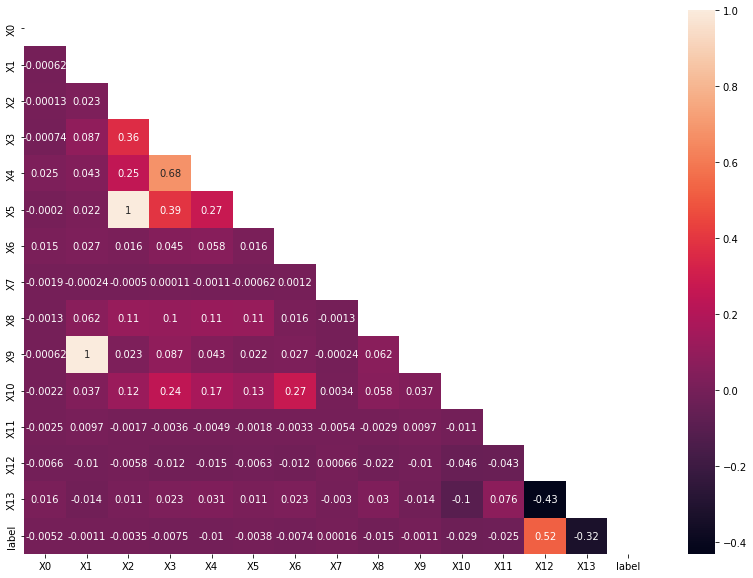

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,label
X0,1.000014,-0.000620,-0.000132,-0.000742,0.024785,-0.000202,0.015461,-0.001948,-0.001298,-0.000620,-0.002240,-0.002543,-0.006559,0.015774,-0.005234
X1,-0.000620,1.000014,0.022751,0.087460,0.043309,0.021576,0.026638,-0.000238,0.062093,1.000014,0.037458,0.009679,-0.010364,-0.013513,-0.001118
X2,-0.000132,0.022751,1.000014,0.363316,0.248573,0.998860,0.015906,-0.000500,0.107356,0.022751,0.118619,-0.001694,-0.005759,0.010507,-0.003480
X3,-0.000742,0.087460,0.363316,1.000014,0.677738,0.391699,0.044868,0.000109,0.103464,0.087460,0.242838,-0.003638,-0.012458,0.022568,-0.007489
X4,0.024785,0.043309,0.248573,0.677738,1.000014,0.268979,0.057795,-0.001076,0.112926,0.043309,0.166760,-0.004940,-0.014937,0.030639,-0.010167
X5,-0.000202,0.021576,0.998860,0.391699,0.268979,1.000014,0.016234,-0.000625,0.107336,0.021576,0.126456,-0.001845,-0.006289,0.011447,-0.003792
X6,0.015461,0.026638,0.015906,0.044868,0.057795,0.016234,1.000014,0.001201,0.015914,0.026638,0.272551,-0.003286,-0.012158,0.022820,-0.007398
X7,-0.001948,-0.000238,-0.000500,0.000109,-0.001076,-0.000625,0.001201,1.000014,-0.001266,-0.000238,0.003394,-0.005442,0.000662,-0.003003,0.000162
X8,-0.001298,0.062093,0.107356,0.103464,0.112926,0.107336,0.015914,-0.001266,1.000014,0.062093,0.058029,-0.002889,-0.021598,0.029646,-0.014757
X9,-0.000620,1.000014,0.022751,0.087460,0.043309,0.021576,0.026638,-0.000238,0.062093,1.000014,0.037458,0.009679,-0.010364,-0.013513,-0.001118


In [12]:
from sklearn.preprocessing import StandardScaler 

cols = data.columns
stdsc = StandardScaler() 
X_std = pd.DataFrame(stdsc.fit_transform(data), columns=cols)

plt.figure(figsize=(14, 10))
hm = sns.heatmap(X_std.cov(), annot=True, mask=np.triu(X_std.cov()))
plt.show()
X_std.cov()


Using sklearn algorithm to calculate feature importance not taking into account the features selected using the correlations. The least important feature will be dropped.

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Build a forest and compute the feature importance
forest = RandomForestClassifier(n_estimators=250, random_state=183608)

important_data = data.drop(['X7', 'X2', 'X9'],axis=1)

forest.fit(important_data.iloc[:, :-1], important_data.iloc[:, -1])
importances = forest.feature_importances_
for index in range(len(important_data.iloc[:, :-1].columns  )):
    print ("Importance of feature ", index, "is", importances[index])

Importance of feature  0 is 5.0893661556572045e-05
Importance of feature  1 is 0.00015609549586294036
Importance of feature  2 is 2.0263453027366847e-06
Importance of feature  3 is 4.523683471195591e-06
Importance of feature  4 is 0.0013916609644149941
Importance of feature  5 is 0.00030316566608214
Importance of feature  6 is 0.2679775704781286
Importance of feature  7 is 0.009900698299201673
Importance of feature  8 is 0.00013298893286767144
Importance of feature  9 is 0.6434653575878128
Importance of feature  10 is 0.07661501888529872


Creating a dataset with less dimensions by dropping irrelevant features

In [14]:
smaller_data = data.drop(['X9','X7','X2','X3'],axis=1)

# Extract features and label data
data_features = smaller_data.iloc[:, :-1]
data_labels = smaller_data.iloc[:, -1]
feature_names = data_features.columns 



## Divide dataset in training and testing
Dividing first the dataset in 80% training and 20% testing

In [15]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_features, data_labels, test_size=0.2, random_state=183608)
print()


# Balanced Dataset

Running the training set through SMOTEENN, that combines oversampling and undersampling, in order to check the resulting number of samples after rebalancing.
These balanced training set will not be used further, as this was only run to print the count of the 2 dataset classes.

In [16]:
from collections import Counter
from imblearn.combine import SMOTEENN


print("before", sorted(Counter(y_train).items()))
smote_enn = SMOTEENN(random_state=183608)
X_balanced, y_balanced = smote_enn.fit_resample(X_train, y_train)
print("after", sorted(Counter(y_balanced).items()))


before [(0, 53366), (1, 2789)]
after [(0, 52149), (1, 37808)]


# Classifier

In [17]:
from imblearn.pipeline import Pipeline 
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler 
import joblib
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

smoteenn = SMOTEENN(random_state=183608)
knn = KNeighborsClassifier()

pipeline_balanced = Pipeline([('scaler', StandardScaler()), ('sampling', smoteenn ), ('classifier', knn )])
pipeline_imbalanced = Pipeline([('scaler', StandardScaler()), ('classifier', knn )])

param_grid_knn = [{'classifier__n_neighbors': np.arange(1, 30, 1), 'classifier__weights': ["uniform", "distance"], 'classifier__p': [1, 2]}]

grid_knn_balanced = GridSearchCV(pipeline_balanced, param_grid_knn, cv=3, n_jobs=-1, verbose=3, scoring=ftwo_scorer, return_train_score="True")
print(grid_knn_balanced.estimator.get_params().keys())
grid_knn_balanced.fit(X_train, y_train.values.ravel())
print(grid_knn_balanced.best_params_ , "with a score of ", grid_knn_balanced.best_score_, "TRAINING")
print("RESULTS ", grid_knn_balanced.cv_results_)
clf_knn_balanced = grid_knn_balanced.best_estimator_
joblib.dump(clf_knn_balanced, 'churn_knn_balanced.joblib')
clf_knn_balanced.fit(X_train, y_train.values.ravel())
predictions_knn_balanced = clf_knn_balanced.predict(X_test)
print("accuracy score TESTING", accuracy_score(y_test.values.ravel(), predictions_knn_balanced))
print ("classification report\n" , classification_report(y_test, predictions_knn_balanced))


grid_knn_imbalanced = GridSearchCV(pipeline_imbalanced, param_grid_knn, cv=3, n_jobs=-1, verbose=3, scoring=ftwo_scorer, return_train_score="True")
print(grid_knn_imbalanced.estimator.get_params().keys())
grid_knn_imbalanced.fit(X_train, y_train.values.ravel())
print(grid_knn_imbalanced.best_params_ , "with a score of ", grid_knn_imbalanced.best_score_)
print("RESULTS ", grid_knn_imbalanced.cv_results_)
clf_knn_imbalanced = grid_knn_imbalanced.best_estimator_
joblib.dump(clf_knn_imbalanced, 'churn_knn_imbalanced.joblib')
clf_knn_imbalanced.fit(X_train, y_train.values.ravel())
predictions_knn_imbalanced = clf_knn_imbalanced.predict(X_test)
print(accuracy_score(y_test.values.ravel(), predictions_knn_imbalanced))
print ("classification report\n" , classification_report(y_test, predictions_knn_imbalanced))


dict_keys(['memory', 'steps', 'verbose', 'scaler', 'sampling', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'sampling__enn', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'sampling__smote', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])
Fitting 3 folds for each of 116 candidates, totalling 348 fits
{'classifier__n_neighbors': 1, 'classifier__p': 2, 'classifier__weights': 'uniform'} with a score of  0.7288103614746538 TRAINING
RESULTS  {'mean_fit_time': array([58.26505399, 56.25927718, 55.82486486, 55.68237281, 57.28528269,
       59.38314239, 61.73156198, 61.62285614, 64.4314154 , 63.93204292,
       65.51449704, 64.86920587, 61.31799324, 61.98763879, 61.64434568,
       56.75708636, 72.60057878, 63.73984814, 66.03691244, 71.45554185,
       73.77874597, 64.00720565, 55.60332966, 54.30493

accuracy score TESTING 0.9621767932188903
classification report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     13304
           1       0.61      0.80      0.69       735

    accuracy                           0.96     14039
   macro avg       0.80      0.88      0.83     14039
weighted avg       0.97      0.96      0.96     14039

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])
Fitting 3 folds for each of 116 candidates, totalling 348 fits
{'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'distance'} with a score of  0.7055527011318196
RESULTS  {'mean_fit_time': array([0.2656281 , 0.27641869, 0.26023277, 0.26865856, 0.25521866,
       0.2943588

0.9751406795355795
classification report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     13304
           1       0.77      0.74      0.76       735

    accuracy                           0.98     14039
   macro avg       0.88      0.86      0.87     14039
weighted avg       0.97      0.98      0.97     14039



Confusion Matrices for balanced and imbalanced dataset with 80-20 train-test

In [18]:
from sklearn.metrics import confusion_matrix

conf_mat_bal = confusion_matrix(y_true=y_test, y_pred=predictions_knn_balanced, normalize='all')
print ('Confusion Matrix Balanced', conf_mat_bal)

conf_mat_imbal = confusion_matrix(y_true=y_test, y_pred=predictions_knn_imbalanced, normalize='all')
print ('Confusion Matrix Imbalanced', conf_mat_imbal)

Confusion Matrix Balanced [[0.92050716 0.02713869]
 [0.01068452 0.04166963]]
Confusion Matrix Imbalanced [[0.93639148 0.01125436]
 [0.01360496 0.0387492 ]]


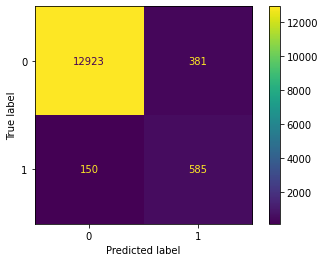

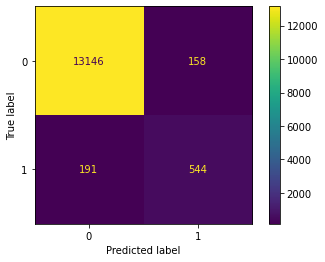

In [19]:
from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, predictions_knn_balanced)

ConfusionMatrixDisplay.from_predictions(y_test, predictions_knn_imbalanced)


Dividing first the dataset in 70% training and 30% testing

In [20]:
from sklearn import model_selection

X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(data_features, data_labels, test_size=0.3, random_state=183608)
print()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'sampling', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'sampling__enn', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'sampling__smote', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])
Fitting 3 folds for each of 116 candidates, totalling 348 fits
{'classifier__n_neighbors': 1, 'classifier__p': 1, 'classifier__weights': 'uniform'} with a score of  0.6794426300881193
RESULTS  {'mean_fit_time': array([33.02838095, 32.56420636, 32.6583902 , 32.30057311, 32.60042222,
       32.22195792, 32.16943622, 31.96903944, 32.05077219, 32.78057941,
       32.37525463, 32.09724895, 32.28265635, 32.55313094, 31.84527882,
       31.62568641, 36.08898123, 33.4644355 , 32.25049472, 32.64571873,
       32.12549639, 32.32600427, 32.66530093, 32.2247932 , 32.0

0.9625813191509568
classification report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     19979
           1       0.60      0.78      0.68      1080

    accuracy                           0.96     21059
   macro avg       0.80      0.88      0.83     21059
weighted avg       0.97      0.96      0.96     21059

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])
Fitting 3 folds for each of 116 candidates, totalling 348 fits
{'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'distance'} with a score of  0.7002926152248278
RESULTS  {'mean_fit_time': array([0.23959104, 0.2423087 , 0.23437357, 0.23480097, 0.23916888,
       0.24479556, 0.26471718, 0.244790

0.9753549551260744
classification report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     19979
           1       0.77      0.75      0.76      1080

    accuracy                           0.98     21059
   macro avg       0.88      0.87      0.87     21059
weighted avg       0.98      0.98      0.98     21059

Confusion Matrix Balanced [[0.92245596 0.02625956]
 [0.01115912 0.04012536]]
Confusion Matrix Imbalanced [[0.93708153 0.01163398]
 [0.01301106 0.03827342]]


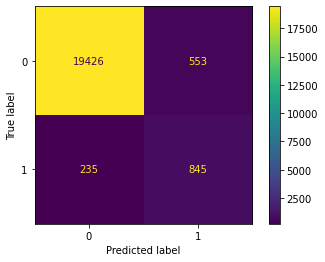

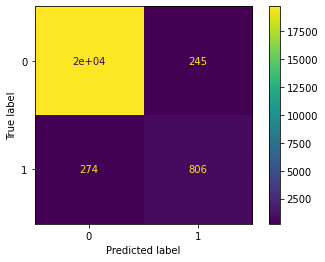

In [21]:
from imblearn.pipeline import Pipeline 
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler 
import joblib
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix


smoteenn = SMOTEENN(random_state=183608)
knn = KNeighborsClassifier()

pipeline_balanced = Pipeline([('scaler', StandardScaler()), ('sampling', smoteenn ), ('classifier', knn )])
pipeline_imbalanced = Pipeline([('scaler', StandardScaler()), ('classifier', knn )])

param_grid_knn = [{'classifier__n_neighbors': np.arange(1, 30, 1), 'classifier__weights': ["uniform", "distance"], 'classifier__p': [1, 2]}]

grid_knn_balanced_2 = GridSearchCV(pipeline_balanced, param_grid_knn, cv=3, n_jobs=-1, verbose=3, scoring=ftwo_scorer, return_train_score="True")
print(grid_knn_balanced_2.estimator.get_params().keys())
grid_knn_balanced_2.fit(X_train_2, y_train_2.values.ravel())
print(grid_knn_balanced_2.best_params_ , "with a score of ", grid_knn_balanced_2.best_score_)
print("RESULTS ", grid_knn_balanced_2.cv_results_)
clf_knn_balanced_2 = grid_knn_balanced_2.best_estimator_
joblib.dump(clf_knn_balanced_2, 'churn_knn_balanced_2.joblib')
clf_knn_balanced_2.fit(X_train_2, y_train_2.values.ravel())
predictions_knn_balanced_2 = clf_knn_balanced_2.predict(X_test_2)
print(accuracy_score(y_test_2.values.ravel(), predictions_knn_balanced_2))
print ("classification report\n" , classification_report(y_test_2, predictions_knn_balanced_2))


grid_knn_imbalanced_2 = GridSearchCV(pipeline_imbalanced, param_grid_knn, cv=3, n_jobs=-1, verbose=3, scoring=ftwo_scorer, return_train_score="True")
print(grid_knn_imbalanced_2.estimator.get_params().keys())
grid_knn_imbalanced_2.fit(X_train_2, y_train_2.values.ravel())
print(grid_knn_imbalanced_2.best_params_ , "with a score of ", grid_knn_imbalanced_2.best_score_)
print("RESULTS ", grid_knn_imbalanced_2.cv_results_)
clf_knn_imbalanced_2 = grid_knn_imbalanced_2.best_estimator_
joblib.dump(clf_knn_imbalanced_2, 'churn_knn_imbalanced_2.joblib')
clf_knn_imbalanced_2.fit(X_train_2, y_train_2.values.ravel())
predictions_knn_imbalanced_2 = clf_knn_imbalanced_2.predict(X_test_2)
print(accuracy_score(y_test_2.values.ravel(), predictions_knn_imbalanced_2))
print ("classification report\n" , classification_report(y_test_2, predictions_knn_imbalanced_2))


conf_mat_bal_2 = confusion_matrix(y_true=y_test_2, y_pred=predictions_knn_balanced_2, normalize='all')
print ('Confusion Matrix Balanced', conf_mat_bal_2)

conf_mat_imbal_2 = confusion_matrix(y_true=y_test_2, y_pred=predictions_knn_imbalanced_2, normalize='all')
print ('Confusion Matrix Imbalanced', conf_mat_imbal_2)


ConfusionMatrixDisplay.from_predictions(y_test_2, predictions_knn_balanced_2)

ConfusionMatrixDisplay.from_predictions(y_test_2, predictions_knn_imbalanced_2)

Dividing first the dataset in 60% training and 40% testing

In [22]:
from sklearn import model_selection

X_train_3, X_test_3, y_train_3, y_test_3 = model_selection.train_test_split(data_features, data_labels, test_size=0.4, random_state=183608)
print()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'sampling', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'sampling__enn', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'sampling__smote', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])
Fitting 3 folds for each of 116 candidates, totalling 348 fits
{'classifier__n_neighbors': 1, 'classifier__p': 1, 'classifier__weights': 'uniform'} with a score of  0.6706263930758084
RESULTS  {'mean_fit_time': array([38.09467252, 36.69875987, 39.25259161, 38.44911114, 38.63319047,
       35.64799643, 39.26173186, 37.19649243, 36.35234276, 36.68931413,
       34.59591826, 34.29603481, 34.98471562, 35.92631118, 34.31144333,
       34.30154133, 33.85575732, 35.2851193 , 35.31743336, 35.41931566,
       36.91372434, 38.58858832, 34.72308358, 33.60799026, 35.2

0.9673053636298882
classification report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     26627
           1       0.67      0.74      0.70      1451

    accuracy                           0.97     28078
   macro avg       0.83      0.86      0.84     28078
weighted avg       0.97      0.97      0.97     28078

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])
Fitting 3 folds for each of 116 candidates, totalling 348 fits
{'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'distance'} with a score of  0.6957980204060698
RESULTS  {'mean_fit_time': array([0.19269538, 0.20313517, 0.19389415, 0.17187222, 0.1834778 ,
       0.18890675, 0.20312564, 0.197922

0.9724339340408861
classification report
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     26627
           1       0.73      0.75      0.74      1451

    accuracy                           0.97     28078
   macro avg       0.86      0.87      0.86     28078
weighted avg       0.97      0.97      0.97     28078

Confusion Matrix Balanced [[0.92923285 0.01908968]
 [0.01360496 0.03807251]]
Confusion Matrix Imbalanced [[0.93368474 0.01463779]
 [0.01292827 0.0387492 ]]


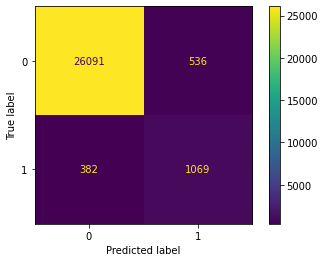

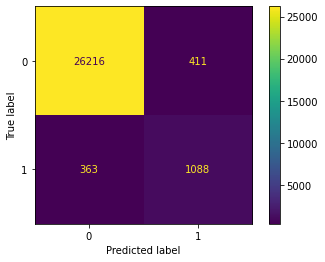

In [50]:
from imblearn.pipeline import Pipeline 
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler 
import joblib
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


smoteenn = SMOTEENN(random_state=183608)
knn = KNeighborsClassifier()

pipeline_balanced = Pipeline([('scaler', StandardScaler()), ('sampling', smoteenn ), ('classifier', knn )])
pipeline_imbalanced = Pipeline([('scaler', StandardScaler()), ('classifier', knn )])

param_grid_knn = [{'classifier__n_neighbors': np.arange(1, 30, 1), 'classifier__weights': ["uniform", "distance"], 'classifier__p': [1, 2]}]

grid_knn_balanced_3 = GridSearchCV(pipeline_balanced, param_grid_knn, cv=3, n_jobs=-1, verbose=3, scoring=ftwo_scorer, return_train_score="True")
print(grid_knn_balanced_3.estimator.get_params().keys())
grid_knn_balanced_3.fit(X_train_3, y_train_3.values.ravel())
print(grid_knn_balanced_3.best_params_ , "with a score of ", grid_knn_balanced_3.best_score_)
print("RESULTS ", grid_knn_balanced_3.cv_results_)
clf_knn_balanced_3 = grid_knn_balanced_3.best_estimator_
joblib.dump(clf_knn_balanced_3, 'churn_knn_balanced_3.joblib')
clf_knn_balanced_3.fit(X_train_3, y_train_3.values.ravel())
predictions_knn_balanced_3 = clf_knn_balanced_3.predict(X_test_3)
print(accuracy_score(y_test_3.values.ravel(), predictions_knn_balanced_3))
print ("classification report\n" , classification_report(y_test_3, predictions_knn_balanced_3))


grid_knn_imbalanced_3 = GridSearchCV(pipeline_imbalanced, param_grid_knn, cv=3, n_jobs=-1, verbose=3, scoring=ftwo_scorer, return_train_score="True")
print(grid_knn_imbalanced_3.estimator.get_params().keys())
grid_knn_imbalanced_3.fit(X_train_3, y_train_3.values.ravel())
print(grid_knn_imbalanced_3.best_params_ , "with a score of ", grid_knn_imbalanced_3.best_score_)
print("RESULTS ", grid_knn_imbalanced_3.cv_results_)
clf_knn_imbalanced_3 = grid_knn_imbalanced_3.best_estimator_
joblib.dump(clf_knn_imbalanced_3, 'churn_knn_imbalanced_3.joblib')
clf_knn_imbalanced_3.fit(X_train_3, y_train_3.values.ravel())
predictions_knn_imbalanced_3 = clf_knn_imbalanced_3.predict(X_test_3)
print(accuracy_score(y_test_3.values.ravel(), predictions_knn_imbalanced_3))
print ("classification report\n" , classification_report(y_test_3, predictions_knn_imbalanced_3))

from sklearn.metrics import confusion_matrix

conf_mat_bal_3 = confusion_matrix(y_true=y_test_3, y_pred=predictions_knn_balanced_3, normalize='all')
print ('Confusion Matrix Balanced', conf_mat_bal_3)

conf_mat_imbal_3 = confusion_matrix(y_true=y_test_3, y_pred=predictions_knn_imbalanced_3, normalize='all')
print ('Confusion Matrix Imbalanced', conf_mat_imbal_3)


ConfusionMatrixDisplay.from_predictions(y_test_3, predictions_knn_balanced_3)

ConfusionMatrixDisplay.from_predictions(y_test_3, predictions_knn_imbalanced_3)

# LOAD BEST ESTIMATOR FROM FILE

Run this step to load the best estimator for Balanced Dataset with 80-20 train-test

In [24]:
import joblib
from sklearn.metrics import accuracy_score, classification_report

clf_knn_balanced =joblib.load( 'churn_knn_balanced.joblib')
clf_knn_balanced.fit(X_train, y_train.values.ravel())
predictions_knn_balanced = clf_knn_balanced.predict(X_test)
print(accuracy_score(y_test.values.ravel(), predictions_knn_balanced))
print ("classification report\n" , classification_report(y_test, predictions_knn_balanced))

0.9621767932188903
classification report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     13304
           1       0.61      0.80      0.69       735

    accuracy                           0.96     14039
   macro avg       0.80      0.88      0.83     14039
weighted avg       0.97      0.96      0.96     14039



Run this step to load the best estimator for Imbalanced Dataset with 80-20 train-test

In [25]:
import joblib
from sklearn.metrics import accuracy_score, classification_report

clf_knn_imbalanced =joblib.load( 'churn_knn_imbalanced.joblib')
clf_knn_imbalanced.fit(X_train, y_train.values.ravel())
predictions_knn_imbalanced = clf_knn_imbalanced.predict(X_test)
print(accuracy_score(y_test.values.ravel(), predictions_knn_imbalanced))
print ("classification report\n" , classification_report(y_test, predictions_knn_imbalanced))

0.9751406795355795
classification report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     13304
           1       0.77      0.74      0.76       735

    accuracy                           0.98     14039
   macro avg       0.88      0.86      0.87     14039
weighted avg       0.97      0.98      0.97     14039



Learning curve plot for 60-40 train/validation balanced data distribution for p=1 and weight=uniform

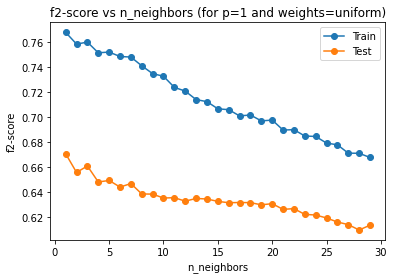

In [92]:
from matplotlib import pyplot

cv_results_knn_balanced_3 = pd.DataFrame(grid_knn_balanced_3.cv_results_)

bool_p = cv_results_knn_balanced_3["param_classifier__p"]==1 
bool_weight= cv_results_knn_balanced_3["param_classifier__weights"]=="uniform"

cv_results_bal_3 = cv_results_knn_balanced_3.loc[bool_p & bool_weight]

mean_test_score_bal_3 = cv_results_bal_3["mean_test_score"]
mean_train_score_bal_3 = cv_results_bal_3["mean_train_score"]

#print (cv_results_bal_3_p)
values = [i for i in range(1, 30)]

pyplot.plot(values, mean_train_score_bal_3, '-o', label='Train')
pyplot.plot(values, mean_test_score_bal_3, '-o', label='Test')
plt.title("f2-score vs n_neighbors (for p=1 and weights=uniform)")
plt.xlabel('n_neighbors')
plt.ylabel('f2-score')
pyplot.legend()
pyplot.show()

Learning curve plot for 60-40 train/validation imbalanced data distribution for p=1 and weight=uniform

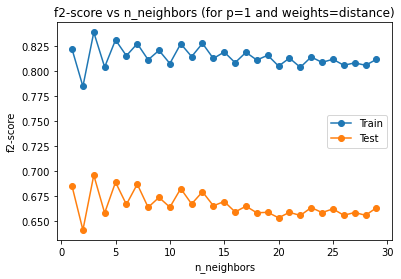

In [93]:
from matplotlib import pyplot

cv_results_knn_imbalanced_3 = pd.DataFrame(grid_knn_imbalanced_3.cv_results_)

bool_p = cv_results_knn_imbalanced_3["param_classifier__p"]==1 
bool_weight= cv_results_knn_imbalanced_3["param_classifier__weights"]=="distance"

cv_results_imbal_3 = cv_results_knn_imbalanced_3.loc[bool_p & bool_weight]

mean_test_score_imbal_3 = cv_results_imbal_3["mean_test_score"]
mean_train_score_imbal_3 = cv_results_imbal_3["mean_train_score"]

#print (cv_results_bal_3_p)
values = [i for i in range(1, 30)]

pyplot.plot(values, mean_train_score_imbal_3, '-o', label='Train')
pyplot.plot(values, mean_test_score_imbal_3, '-o', label='Test')
plt.title("f2-score vs n_neighbors (for p=1 and weights=distance)")
plt.xlabel('n_neighbors')
plt.ylabel('f2-score')
pyplot.legend()
pyplot.show()

Learning curve plot for 70-30 train/validation balanced data distribution for p=1 and weight=uniform

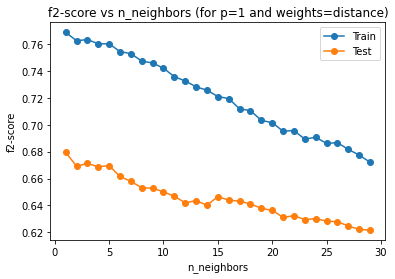

In [94]:
from matplotlib import pyplot

cv_results_knn_balanced_2 = pd.DataFrame(grid_knn_balanced_2.cv_results_)

bool_p = cv_results_knn_balanced_2["param_classifier__p"]==1 
bool_weight= cv_results_knn_balanced_2["param_classifier__weights"]=="uniform"

cv_results_bal_2 = cv_results_knn_balanced_2.loc[bool_p & bool_weight]

mean_test_score_bal_2 = cv_results_bal_2["mean_test_score"]
mean_train_score_bal_2 = cv_results_bal_2["mean_train_score"]

values = [i for i in range(1, 30)]

pyplot.plot(values, mean_train_score_bal_2, '-o', label='Train')
pyplot.plot(values, mean_test_score_bal_2, '-o', label='Test')
plt.title("f2-score vs n_neighbors (for p=1 and weights=distance)")
plt.xlabel('n_neighbors')
plt.ylabel('f2-score')
pyplot.legend()
pyplot.show()

Learning curve plot for 70-30 train/validation imbalanced data distribution for p=1 and weight=uniform

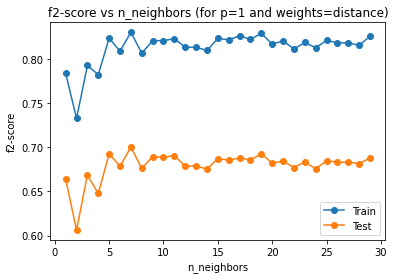

In [95]:
from matplotlib import pyplot

cv_results_knn_imbalanced_2 = pd.DataFrame(grid_knn_imbalanced_2.cv_results_)

bool_p = cv_results_knn_imbalanced_2["param_classifier__p"]==1 
bool_weight= cv_results_knn_imbalanced_2["param_classifier__weights"]=="distance"

cv_results_imbal_2 = cv_results_knn_imbalanced_2.loc[bool_p & bool_weight]

mean_test_score_imbal_2 = cv_results_imbal_2["mean_test_score"]
mean_train_score_imbal_2 = cv_results_imbal_2["mean_train_score"]

#print (cv_results_bal_3_p)
values = [i for i in range(1, 30)]

pyplot.plot(values, mean_train_score_imbal_2, '-o', label='Train')
pyplot.plot(values, mean_test_score_imbal_2, '-o', label='Test')
plt.title("f2-score vs n_neighbors (for p=1 and weights=distance)")
plt.xlabel('n_neighbors')
plt.ylabel('f2-score')
pyplot.legend()
pyplot.show()

Learning curve plot for 80-20 train/validation balanced data distribution for p=1 and weight=uniform

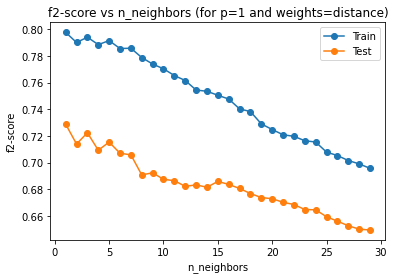

In [97]:
from matplotlib import pyplot

cv_results_knn_balanced = pd.DataFrame(grid_knn_balanced.cv_results_)

bool_p = cv_results_knn_balanced["param_classifier__p"]==2 
bool_weight= cv_results_knn_balanced["param_classifier__weights"]=="uniform"

cv_results_bal = cv_results_knn_balanced.loc[bool_p & bool_weight]

mean_test_score_bal = cv_results_bal["mean_test_score"]
mean_train_score_bal = cv_results_bal["mean_train_score"]

values = [i for i in range(1, 30)]

pyplot.plot(values, mean_train_score_bal, '-o', label='Train')
pyplot.plot(values, mean_test_score_bal, '-o', label='Test')
plt.title("f2-score vs n_neighbors (for p=1 and weights=distance)")
plt.xlabel('n_neighbors')
plt.ylabel('f2-score')
pyplot.legend()
pyplot.show()

Learning curve plot for 80-20 train/validation imbalanced data distribution for p=1 and weight=uniform

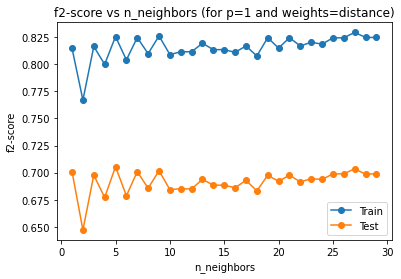

In [96]:
from matplotlib import pyplot

cv_results_knn_imbalanced = pd.DataFrame(grid_knn_imbalanced.cv_results_)

bool_p = cv_results_knn_imbalanced["param_classifier__p"]==1 
bool_weight= cv_results_knn_imbalanced["param_classifier__weights"]=="distance"

cv_results_imbal = cv_results_knn_imbalanced.loc[bool_p & bool_weight]

mean_test_score_imbal = cv_results_imbal["mean_test_score"]
mean_train_score_imbal = cv_results_imbal["mean_train_score"]

values = [i for i in range(1, 30)]

pyplot.plot(values, mean_train_score_imbal, '-o', label='Train')
pyplot.plot(values, mean_test_score_imbal, '-o', label='Test')
plt.title("f2-score vs n_neighbors (for p=1 and weights=distance)")
plt.xlabel('n_neighbors')
plt.ylabel('f2-score')
pyplot.legend()
pyplot.show()

Plot of all the iterations of GridSearchCV for 60-40, 70-30 and 80-20 balanced and imbalanced data distributions

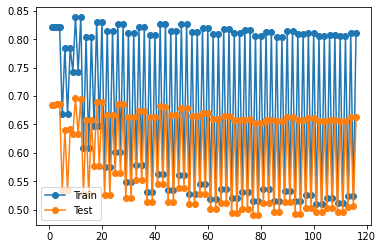

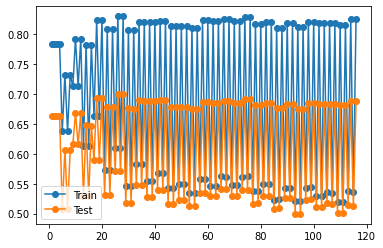

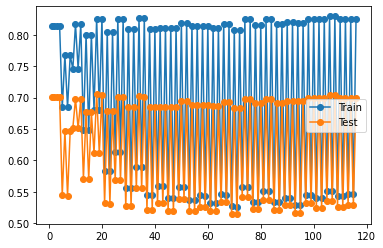

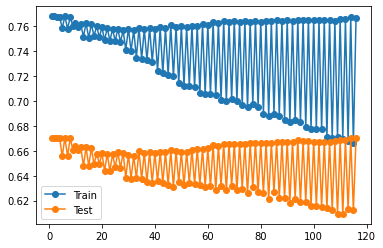

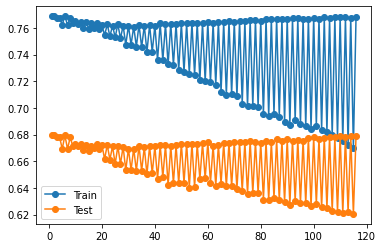

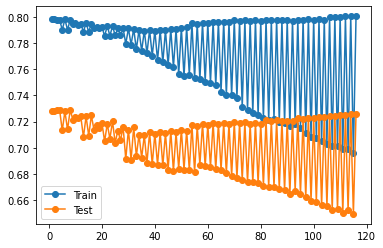

In [98]:
from matplotlib import pyplot

cv_results_knn_imbalanced_3 = pd.DataFrame(grid_knn_imbalanced_3.cv_results_)
cv_results_knn_imbalanced_3.describe()
cv_results_knn_balanced_3 = pd.DataFrame(grid_knn_balanced_3.cv_results_)
cv_results_knn_imbalanced_2 = pd.DataFrame(grid_knn_imbalanced_2.cv_results_)
cv_results_knn_balanced_2 = pd.DataFrame(grid_knn_balanced_2.cv_results_)
cv_results_knn_imbalanced = pd.DataFrame(grid_knn_imbalanced.cv_results_)
cv_results_knn_balanced = pd.DataFrame(grid_knn_balanced.cv_results_)

test_scores_imbalanced_3 = cv_results_knn_imbalanced_3['mean_test_score']
train_scores_imbalanced_3 = cv_results_knn_imbalanced_3['mean_train_score']
test_scores_balanced_3 = cv_results_knn_balanced_3['mean_test_score']
train_scores_balanced_3 = cv_results_knn_balanced_3['mean_train_score']

test_scores_imbalanced_2 = cv_results_knn_imbalanced_2['mean_test_score']
train_scores_imbalanced_2 = cv_results_knn_imbalanced_2['mean_train_score']
test_scores_balanced_2 = cv_results_knn_balanced_2['mean_test_score']
train_scores_balanced_2 = cv_results_knn_balanced_2['mean_train_score']

test_scores_imbalanced = cv_results_knn_imbalanced['mean_test_score']
train_scores_imbalanced = cv_results_knn_imbalanced['mean_train_score']
test_scores_balanced = cv_results_knn_balanced['mean_test_score']
train_scores_balanced = cv_results_knn_balanced['mean_train_score']

values = [i for i in range(1, 117)]

pyplot.plot(values, train_scores_imbalanced_3, '-o', label='Train')
pyplot.plot(values, test_scores_imbalanced_3, '-o', label='Test')
pyplot.legend()
pyplot.show()

pyplot.plot(values, train_scores_imbalanced_2, '-o', label='Train')
pyplot.plot(values, test_scores_imbalanced_2, '-o', label='Test')
pyplot.legend()
pyplot.show()

pyplot.plot(values, train_scores_imbalanced, '-o', label='Train')
pyplot.plot(values, test_scores_imbalanced, '-o', label='Test')
pyplot.legend()
pyplot.show()

pyplot.plot(values, train_scores_balanced_3, '-o', label='Train')
pyplot.plot(values, test_scores_balanced_3, '-o', label='Test')
pyplot.legend()
pyplot.show()

pyplot.plot(values, train_scores_balanced_2, '-o', label='Train')
pyplot.plot(values, test_scores_balanced_2, '-o', label='Test')
pyplot.legend()
pyplot.show()

pyplot.plot(values, train_scores_balanced, '-o', label='Train')
pyplot.plot(values, test_scores_balanced, '-o', label='Test')
pyplot.legend()
pyplot.show()


f2-score for validation dataset 

In [99]:
from sklearn.metrics import fbeta_score
print(fbeta_score(y_test.values.ravel(), predictions_knn_imbalanced, beta=2))
print(fbeta_score(y_test.values.ravel(), predictions_knn_balanced, beta=2))

print(fbeta_score(y_test_2.values.ravel(), predictions_knn_imbalanced_2, beta=2))
print(fbeta_score(y_test_2.values.ravel(), predictions_knn_balanced_2, beta=2))

print(fbeta_score(y_test_3.values.ravel(), predictions_knn_imbalanced_3, beta=2))
print(fbeta_score(y_test_3.values.ravel(), predictions_knn_balanced_3, beta=2))

0.7468423942888522
0.7488479262672811
0.7503258238689258
0.7388947184330186
0.744899356428865
0.7214198947226347
